# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras import layers, models, Model
from keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np

# Descriptive Analytics

## Data Pre-processing and Data Augmentation

In [2]:
IMAGE_SIZE = [160, 160]

In [3]:
trainingDataGenerator = ImageDataGenerator(rotation_range = 360,
                                     width_shift_range = 0.05,
                                     height_shift_range = 0.05,
                                     shear_range = 0.05,
                                     zoom_range = 0.05,
                                     horizontal_flip = True,
                                     vertical_flip = True,
                                     brightness_range = [0.75, 1.25],
                                     rescale = 1./255)

In [4]:
training_data = trainingDataGenerator.flow_from_directory(
        'C:/Users/91865/Desktop/archive/casting_data/casting_data/train',
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode="binary",shuffle=True
)

Found 6633 images belonging to 2 classes.


In [5]:
classes = os.listdir('C:/Users/91865/Desktop/archive/casting_data/casting_data/train')
classes

['def_front', 'ok_front']

## Data Vizualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

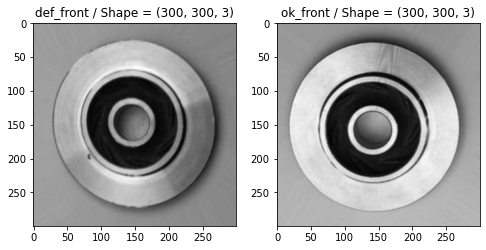

In [6]:
plt.figure(figsize=(8,8))

for i in enumerate(classes):
    pic = os.listdir('C:/Users/91865/Desktop/archive/casting_data/casting_data/train/'+i[1])[0]
    image = Image.open('C:/Users/91865/Desktop/archive/casting_data/casting_data/train/'+i[1]+'/'+pic)
    image = np.asarray(image)
    plt.subplot(1,2,i[0]+1)
    plt.title('{0} / Shape = {1}'.format(i[1], image.shape))
    plt.imshow(image)
plt.show()

In [7]:
validation_data = trainingDataGenerator.flow_from_directory(
        'C:/Users/91865/Desktop/archive/casting_data/casting_data/test',
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode="binary", shuffle=True
)

Found 715 images belonging to 2 classes.


In [8]:
testDataGenerator = ImageDataGenerator(rescale = 1./255)
test_data = testDataGenerator.flow_from_directory(
        'C:/Users/91865/Desktop/archive/casting_512x512/casting_512x512',
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode="binary", shuffle=False
)

Found 1300 images belonging to 2 classes.


In [9]:
train_def="C:/Users/91865/Desktop/archive/casting_data/casting_data/train/def_front"
train_ok="C:/Users/91865/Desktop/archive/casting_data/casting_data/train/ok_front"
test_def="C:/Users/91865/Desktop/archive/casting_data/casting_data/test/def_front"
test_ok="C:/Users/91865/Desktop/archive/casting_data/casting_data/test/ok_front"

In [10]:
x_train = np.array([len(os.listdir(train_def)),len(os.listdir(train_ok))])
x_test = np.array([len(os.listdir(test_def)),len(os.listdir(test_ok))])
label = ['Defective','Ok']

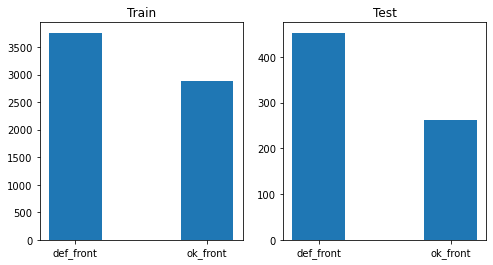

 Defective Training Images 	: 3758
 Ok Training Images 		: 2875
 Defective Testing Images 	: 453
 Ok Testing Images 		: 262


In [11]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].bar(classes,x_train,width = 0.4)
axes[1].bar(classes,x_test,width = 0.4)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

print(' Defective Training Images \t: ' + str(len(os.listdir(train_def))))
print(' Ok Training Images \t\t: ' + str(len(os.listdir(train_ok))))
print(' Defective Testing Images \t: ' + str(len(os.listdir(test_def))))
print(' Ok Testing Images \t\t: ' + str(len(os.listdir(test_ok))))

# Predictive Analytics

## Model Formulation

In [12]:
mobilenet_v2= MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [13]:
for layer in mobilenet_v2.layers:
  layer.trainable = False

In [14]:
x = Flatten()(mobilenet_v2.output)

In [15]:
prediction = Dense(1, activation='sigmoid')(x)

In [16]:
model = Model(inputs=mobilenet_v2.input, outputs=prediction)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][0]']           

## Model Compilation

In [18]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [19]:
history = model.fit(training_data,
        validation_data=validation_data,
        epochs=10
) 


Epoch 1/10
208/208 [==============================] - 98s 463ms/step - loss: 0.2436 - accuracy: 0.9252 - val_loss: 0.0658 - val_accuracy: 0.9734
Epoch 2/10
208/208 [==============================] - 79s 381ms/step - loss: 0.0525 - accuracy: 0.9839 - val_loss: 0.0528 - val_accuracy: 0.9790
Epoch 3/10
208/208 [==============================] - 82s 395ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0297 - val_accuracy: 0.9888
Epoch 4/10
208/208 [==============================] - 77s 370ms/step - loss: 0.0376 - accuracy: 0.9872 - val_loss: 0.0486 - val_accuracy: 0.9818
Epoch 5/10
208/208 [==============================] - 77s 371ms/step - loss: 0.0908 - accuracy: 0.9703 - val_loss: 0.1839 - val_accuracy: 0.9552
Epoch 6/10
208/208 [==============================] - 76s 366ms/step - loss: 0.0447 - accuracy: 0.9869 - val_loss: 0.0195 - val_accuracy: 0.9930
Epoch 7/10
208/208 [==============================] - 76s 366ms/step - loss: 0.0366 - accuracy: 0.9910 - val_loss: 0.0212 - val_ac

## Evaluation and Prediction

In [20]:
evaluation = model.evaluate(test_data)

41/41 [==============================] - 9s 209ms/step - loss: 0.8859 - accuracy: 0.8300


Text(0, 0.5, 'Metrics')

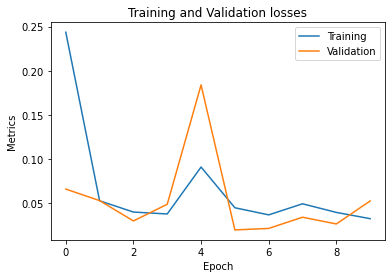

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('Epoch')
plt.ylabel('Metrics')

Text(0, 0.5, 'Metrics')

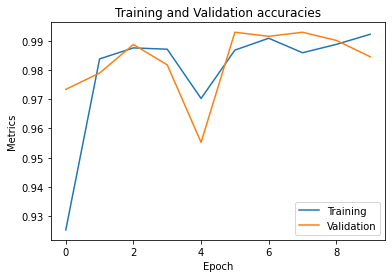

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracies')
plt.xlabel('Epoch')
plt.ylabel('Metrics')

In [23]:
from keras.models import load_model

model.save('CD_MobileNet_V2.h5')

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
y_pred_prob = model.predict(test_data)

In [26]:
THRESHOLD = 0.5
y_pred_class = (y_pred_prob >= THRESHOLD).reshape(-1,)
y_true_class = test_data.classes[test_data.index_array]

pd.DataFrame(
    confusion_matrix(y_true_class, y_pred_class),
    index = [["Actual", "Actual"], [ "defect","ok"]],
    columns = [["Predicted", "Predicted"], ["defect","ok"]],
)

<IPython.core.display.Javascript object>

Predicted     
                 defect   ok
Actual defect       703   78
       ok           143  376

In [27]:
print(classification_report(y_true_class, y_pred_class, digits = 4))

              precision    recall  f1-score   support

           0     0.8310    0.9001    0.8642       781
           1     0.8282    0.7245    0.7729       519

    accuracy                         0.8300      1300
   macro avg     0.8296    0.8123    0.8185      1300
weighted avg     0.8299    0.8300    0.8277      1300



## Fine-tuning 

In [28]:
from tensorflow import keras

In [29]:
model.trainable = True

In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][0]']           

In [31]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

In [32]:
epochs = 10
model.fit(training_data, epochs=epochs, validation_data=validation_data)

Epoch 1/10


C:\Users\91865\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


208/208 [==============================] - 232s 1s/step - loss: 1.4989 - binary_accuracy: 0.8532 - val_loss: 1.7272 - val_binary_accuracy: 0.7580
Epoch 2/10
208/208 [==============================] - 217s 1s/step - loss: 0.3116 - binary_accuracy: 0.9415 - val_loss: 0.8713 - val_binary_accuracy: 0.8629
Epoch 3/10
208/208 [==============================] - 223s 1s/step - loss: 0.2335 - binary_accuracy: 0.9552 - val_loss: 1.0013 - val_binary_accuracy: 0.8434
Epoch 4/10
208/208 [==============================] - 252s 1s/step - loss: 0.1632 - binary_accuracy: 0.9685 - val_loss: 1.0174 - val_binary_accuracy: 0.8629
Epoch 5/10
208/208 [==============================] - 249s 1s/step - loss: 0.1233 - binary_accuracy: 0.9739 - val_loss: 0.5888 - val_binary_accuracy: 0.9063
Epoch 6/10
208/208 [==============================] - 248s 1s/step - loss: 0.1186 - binary_accuracy: 0.9763 - val_loss: 0.6962 - val_binary_accuracy: 0.8937
Epoch 7/10
208/208 [==============================] - 251s 1s/step - 

Text(0, 0.5, 'Metrics')

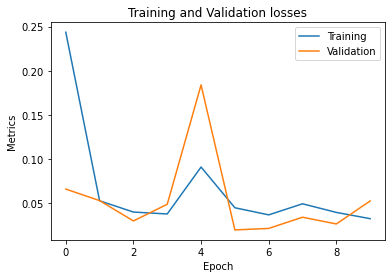

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('Epoch')
plt.ylabel('Metrics')

Text(0, 0.5, 'Metrics')

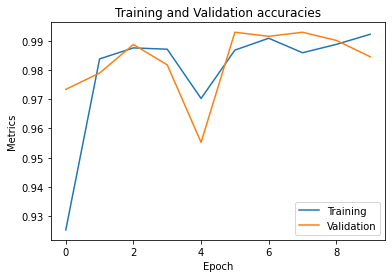

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracies')
plt.xlabel('Epoch')
plt.ylabel('Metrics')

In [35]:
evaluation1 = model.evaluate(test_data)

41/41 [==============================] - 11s 259ms/step - loss: 3.2556 - binary_accuracy: 0.6477


In [36]:
y_pred_prob1 = model.predict(test_data)

In [37]:
THRESHOLD = 0.5
y_pred_class = (y_pred_prob1 >= THRESHOLD).reshape(-1,)
y_true_class = test_data.classes[test_data.index_array]

pd.DataFrame(
    confusion_matrix(y_true_class, y_pred_class),
    index = [["Actual", "Actual"], [ "defect","ok"]],
    columns = [["Predicted", "Predicted"], ["defect","ok"]],
)

<IPython.core.display.Javascript object>

Predicted     
                 defect   ok
Actual defect       429  352
       ok           106  413

In [38]:
print(classification_report(y_true_class, y_pred_class, digits = 4))

              precision    recall  f1-score   support

           0     0.8019    0.5493    0.6520       781
           1     0.5399    0.7958    0.6433       519

    accuracy                         0.6477      1300
   macro avg     0.6709    0.6725    0.6476      1300
weighted avg     0.6973    0.6477    0.6485      1300



After fine-tuning, the model, the accuracy of model is less as compared to the model without fine-tuning. So it is recommended to use the model without fine-tuning.